In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('./dataset/dataset.csv', on_bad_lines='skip', header=None, sep=' ', encoding='latin-1')
df.head()

,0,1,2,3
0,929840853,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/thumb...,-
1,929840856,1.190146e+09,http://en.wikipedia.org/images/wiki-en.png,-
2,929840854,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-
3,929840855,1.190146e+09,http://es.wikipedia.org/w/index.php?title=-&ac...,-
4,929840857,1.190146e+09,http://en.wikipedia.org/w/index.php?title=Medi...,-


In [3]:
df.shape

(10628126, 4)

In [4]:
df.columns = ['monotonic', 'timestamp', 'url', 'flag']

In [5]:
df.head(2)

,monotonic,timestamp,url,flag
0,929840853,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/thumb...,-
1,929840856,1.190146e+09,http://en.wikipedia.org/images/wiki-en.png,-


In [6]:
df.url.value_counts()[:1000]

http://upload.wikimedia.org/wikipedia/en/1/18/Monobook-bullet.png                                                                     178390
http://meta.wikimedia.org/w/index.php?title=MediaWiki:Wikiminiatlas.js&action=raw&ctype=text/javascript&smaxage=21600&maxage=86400    144528
http://en.wikipedia.org/w/index.php?title=MediaWiki:Common.css&usemsgcache=yes&action=raw&ctype=text/css&smaxage=2678400              124553
http://en.wikipedia.org/w/index.php?title=-&action=raw&gen=css&maxage=2678400                                                         124164
http://en.wikipedia.org/w/index.php?title=MediaWiki:Monobook.css&usemsgcache=yes&action=raw&ctype=text/css&smaxage=2678400            123958
                                                                                                                                       ...  
http://pt.wikipedia.org/skins-1.5/common/images/button_media.png                                                                         649
http://upload

In [7]:
df.duplicated().sum()

0

In [8]:
n = len(df)

In [9]:
cut = int(n*0.005)

In [10]:
cut

53140

In [11]:
dataset = df.iloc[:cut]

In [12]:
dataset

,monotonic,timestamp,url,flag
0,929840853,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/thumb...,-
1,929840856,1.190146e+09,http://en.wikipedia.org/images/wiki-en.png,-
2,929840854,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-
3,929840855,1.190146e+09,http://es.wikipedia.org/w/index.php?title=-&ac...,-
4,929840857,1.190146e+09,http://en.wikipedia.org/w/index.php?title=Medi...,-
...,...,...,...,...
53135,929893987,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-
53136,929893989,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/thumb...,-
53137,929893991,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-
53138,929893990,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-


In [13]:
# dataset.to_csv('./dataset/wikipedia_50000_line.csv', index=False)

In [20]:
dataset = pd.read_csv('./dataset/wikipedia_50000_line.csv')
dataset.head()

,monotonic,timestamp,url,flag
0,929840853,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/thumb...,-
1,929840856,1.190146e+09,http://en.wikipedia.org/images/wiki-en.png,-
2,929840854,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-
3,929840855,1.190146e+09,http://es.wikipedia.org/w/index.php?title=-&ac...,-
4,929840857,1.190146e+09,http://en.wikipedia.org/w/index.php?title=Medi...,-


In [21]:
dataset.dtypes

monotonic      int64
timestamp    float64
url           object
flag          object
dtype: object

In [22]:
dataset.isnull().sum()

monotonic    0
timestamp    0
url          0
flag         0
dtype: int64

In [25]:
dataset.loc[:,'url'] = dataset.url.str.replace('//', '*')

In [26]:
dataset.head()

,monotonic,timestamp,url,flag
0,929840853.0,1.190146e+09,http:*upload.wikimedia.org/wikipedia/en/thumb/...,-
1,929840856.0,1.190146e+09,http:*en.wikipedia.org/images/wiki-en.png,-
2,929840854.0,1.190146e+09,http:*upload.wikimedia.org/wikipedia/commons/t...,-
3,929840855.0,1.190146e+09,http:*es.wikipedia.org/w/index.php?title=-&act...,-
4,929840857.0,1.190146e+09,http:*en.wikipedia.org/w/index.php?title=Media...,-


In [27]:
dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']] = dataset.url.str.split('/', expand=True)

In [28]:
dataset.head()

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,929840853.0,1.190146e+09,http:*upload.wikimedia.org/wikipedia/en/thumb/...,-,http:*upload.wikimedia.org,wikipedia,en,thumb,e,e4,James_Johnson.jpg,200px-James_Johnson.jpg
1,929840856.0,1.190146e+09,http:*en.wikipedia.org/images/wiki-en.png,-,http:*en.wikipedia.org,images,wiki-en.png,None,None,None,None,None
2,929840854.0,1.190146e+09,http:*upload.wikimedia.org/wikipedia/commons/t...,-,http:*upload.wikimedia.org,wikipedia,commons,thumb,b,b9,Flag_of_Australia.svg,22px-Flag_of_Australia.svg.png
3,929840855.0,1.190146e+09,http:*es.wikipedia.org/w/index.php?title=-&act...,-,http:*es.wikipedia.org,w,index.php?title=-&action=raw&gen=js&useskin=mo...,None,None,None,None,None
4,929840857.0,1.190146e+09,http:*en.wikipedia.org/w/index.php?title=Media...,-,http:*en.wikipedia.org,w,index.php?title=MediaWiki:Monobook.css&usemsgc...,css&smaxage=2678400,None,None,None,None


In [29]:
dataset.url = dataset.url.str.replace('*', '//')

In [30]:
dataset.prefix_1 = dataset.prefix_1.str.replace('*', '//')

In [31]:
dataset.head()

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,929840853.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/thumb...,-,http://upload.wikimedia.org,wikipedia,en,thumb,e,e4,James_Johnson.jpg,200px-James_Johnson.jpg
1,929840856.0,1.190146e+09,http://en.wikipedia.org/images/wiki-en.png,-,http://en.wikipedia.org,images,wiki-en.png,None,None,None,None,None
2,929840854.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-,http://upload.wikimedia.org,wikipedia,commons,thumb,b,b9,Flag_of_Australia.svg,22px-Flag_of_Australia.svg.png
3,929840855.0,1.190146e+09,http://es.wikipedia.org/w/index.php?title=-&ac...,-,http://es.wikipedia.org,w,index.php?title=-&action=raw&gen=js&useskin=mo...,None,None,None,None,None
4,929840857.0,1.190146e+09,http://en.wikipedia.org/w/index.php?title=Medi...,-,http://en.wikipedia.org,w,index.php?title=MediaWiki:Monobook.css&usemsgc...,css&smaxage=2678400,None,None,None,None


In [32]:
cek_data = dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']]

In [33]:
cek_data.shape

(53141, 8)

In [36]:
cek_data.dropna(subset=['prefix_1'], inplace=True)

C:\Users\RESIDENSI-03\AppData\Local\Temp\ipykernel_8904\2387690799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cek_data.dropna(subset=['prefix_1'], inplace=True)


In [37]:
cek_data['prefix_1'].isnull().sum()

0

In [38]:
cek_data.head()

,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,http://upload.wikimedia.org,wikipedia,en,thumb,e,e4,James_Johnson.jpg,200px-James_Johnson.jpg
1,http://en.wikipedia.org,images,wiki-en.png,None,None,None,None,None
2,http://upload.wikimedia.org,wikipedia,commons,thumb,b,b9,Flag_of_Australia.svg,22px-Flag_of_Australia.svg.png
3,http://es.wikipedia.org,w,index.php?title=-&action=raw&gen=js&useskin=mo...,None,None,None,None,None
4,http://en.wikipedia.org,w,index.php?title=MediaWiki:Monobook.css&usemsgc...,css&smaxage=2678400,None,None,None,None


In [39]:
cek_data.prefix_2

0        wikipedia
1           images
2        wikipedia
3                w
4                w
           ...    
53135    wikipedia
53136    wikipedia
53137    wikipedia
53138    wikipedia
53139        style
Name: prefix_2, Length: 53140, dtype: object

In [40]:
prefix = list(cek_data.columns)

In [41]:
prefix

['prefix_1',
 'prefix_2',
 'prefix_3',
 'prefix_4',
 'prefix_5',
 'prefix_6',
 'prefix_7',
 'prefix_8']

In [42]:
cek_data.prefix_1.unique()

array(['http://upload.wikimedia.org', 'http://en.wikipedia.org',
       'http://es.wikipedia.org', 'http://pl.wikipedia.org',
       'http://de.wikipedia.org', 'http://en.wiktionary.org',
       'http://pt.wikipedia.org', 'http://hu.wikipedia.org',
       'http://ca.wikipedia.org', 'http://fr.wikipedia.org',
       'http://sv.wikipedia.org', 'http://fi.wikipedia.org',
       'http://it.wikipedia.org', 'http://meta.wikimedia.org',
       'http://www.wikipedia.com', 'http://hi.wikipedia.org',
       'http://ja.wikipedia.org', 'http://en.wikibooks.org',
       'http://www.wikipedia.org', 'http://war.wikipedia.org',
       'http://fr.wiktionary.org', 'http://sk.wikipedia.org',
       'http://no.wikipedia.org', 'http://it.wikiquote.org',
       'http://bn.wikipedia.org', 'http://et.wikipedia.org',
       'http://he.wikipedia.org', 'http://commons.wikimedia.org',
       'http://ar.wikipedia.org', 'http://nl.wikipedia.org',
       'http://de.wiktionary.org', 'http://wikimediafoundation.org',


In [43]:
for i in cek_data:
    print(i)
    print(f'Nama Preifix \n{cek_data[i].unique()[:5]}')
    print(cek_data[i].nunique())
    print()

prefix_1
Nama Preifix 
['http://upload.wikimedia.org' 'http://en.wikipedia.org'
 'http://es.wikipedia.org' 'http://pl.wikipedia.org'
 'http://de.wikipedia.org']
172

prefix_2
Nama Preifix 
['wikipedia' 'images' 'w' 'skins-1.5' 'wiki']
137

prefix_3
Nama Preifix 
['en' 'wiki-en.png' 'commons'
 'index.php?title=-&action=raw&gen=js&useskin=monobook'
 'index.php?title=MediaWiki:Monobook.css&usemsgcache=yes&action=raw&ctype=text']
6271

prefix_4
Nama Preifix 
['thumb' None 'css&smaxage=2678400' 'IE60Fixes.css?99' 'images']
245

prefix_5
Nama Preifix 
['e' None 'b' '4' '9']
333

prefix_6
Nama Preifix 
['e4' None 'b9' '4a' '9a']
2673

prefix_7
Nama Preifix 
['James_Johnson.jpg' None 'Flag_of_Australia.svg' 'Commons-logo.svg'
 'Flag_of_Spain.svg']
11022

prefix_8
Nama Preifix 
['200px-James_Johnson.jpg' None '22px-Flag_of_Australia.svg.png'
 '50px-Commons-logo.svg.png' '20px-Flag_of_Spain.svg.png']
12315



In [44]:
for i in cek_data:
    print(i)
    print(f'Jumlah unique value {cek_data[i].nunique()}')
    print()


prefix_1
Jumlah unique value 172

prefix_2
Jumlah unique value 137

prefix_3
Jumlah unique value 6271

prefix_4
Jumlah unique value 245

prefix_5
Jumlah unique value 333

prefix_6
Jumlah unique value 2673

prefix_7
Jumlah unique value 11022

prefix_8
Jumlah unique value 12315



In [45]:
dic_prefix_1_key = list(cek_data.prefix_1.unique())

In [46]:
dic_prefix_1_key

['http://upload.wikimedia.org',
 'http://en.wikipedia.org',
 'http://es.wikipedia.org',
 'http://pl.wikipedia.org',
 'http://de.wikipedia.org',
 'http://en.wiktionary.org',
 'http://pt.wikipedia.org',
 'http://hu.wikipedia.org',
 'http://ca.wikipedia.org',
 'http://fr.wikipedia.org',
 'http://sv.wikipedia.org',
 'http://fi.wikipedia.org',
 'http://it.wikipedia.org',
 'http://meta.wikimedia.org',
 'http://www.wikipedia.com',
 'http://hi.wikipedia.org',
 'http://ja.wikipedia.org',
 'http://en.wikibooks.org',
 'http://www.wikipedia.org',
 'http://war.wikipedia.org',
 'http://fr.wiktionary.org',
 'http://sk.wikipedia.org',
 'http://no.wikipedia.org',
 'http://it.wikiquote.org',
 'http://bn.wikipedia.org',
 'http://et.wikipedia.org',
 'http://he.wikipedia.org',
 'http://commons.wikimedia.org',
 'http://ar.wikipedia.org',
 'http://nl.wikipedia.org',
 'http://de.wiktionary.org',
 'http://wikimediafoundation.org',
 'http://tr.wikipedia.org',
 'http://en.wikinews.org',
 'http://csb.wikipedia.or

In [47]:
dic_prefix_1_value = list(pd.Series(range(1,173)))

In [48]:
len(dic_prefix_1_key)

172

In [49]:
prefix_1_dictionary = dict(zip(dic_prefix_1_key, dic_prefix_1_value))

In [50]:
prefix_1_dictionary

{'http://upload.wikimedia.org': 1,
 'http://en.wikipedia.org': 2,
 'http://es.wikipedia.org': 3,
 'http://pl.wikipedia.org': 4,
 'http://de.wikipedia.org': 5,
 'http://en.wiktionary.org': 6,
 'http://pt.wikipedia.org': 7,
 'http://hu.wikipedia.org': 8,
 'http://ca.wikipedia.org': 9,
 'http://fr.wikipedia.org': 10,
 'http://sv.wikipedia.org': 11,
 'http://fi.wikipedia.org': 12,
 'http://it.wikipedia.org': 13,
 'http://meta.wikimedia.org': 14,
 'http://www.wikipedia.com': 15,
 'http://hi.wikipedia.org': 16,
 'http://ja.wikipedia.org': 17,
 'http://en.wikibooks.org': 18,
 'http://www.wikipedia.org': 19,
 'http://war.wikipedia.org': 20,
 'http://fr.wiktionary.org': 21,
 'http://sk.wikipedia.org': 22,
 'http://no.wikipedia.org': 23,
 'http://it.wikiquote.org': 24,
 'http://bn.wikipedia.org': 25,
 'http://et.wikipedia.org': 26,
 'http://he.wikipedia.org': 27,
 'http://commons.wikimedia.org': 28,
 'http://ar.wikipedia.org': 29,
 'http://nl.wikipedia.org': 30,
 'http://de.wiktionary.org': 31,


In [51]:
dataset.head()

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,929840853.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/thumb...,-,http://upload.wikimedia.org,wikipedia,en,thumb,e,e4,James_Johnson.jpg,200px-James_Johnson.jpg
1,929840856.0,1.190146e+09,http://en.wikipedia.org/images/wiki-en.png,-,http://en.wikipedia.org,images,wiki-en.png,None,None,None,None,None
2,929840854.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-,http://upload.wikimedia.org,wikipedia,commons,thumb,b,b9,Flag_of_Australia.svg,22px-Flag_of_Australia.svg.png
3,929840855.0,1.190146e+09,http://es.wikipedia.org/w/index.php?title=-&ac...,-,http://es.wikipedia.org,w,index.php?title=-&action=raw&gen=js&useskin=mo...,None,None,None,None,None
4,929840857.0,1.190146e+09,http://en.wikipedia.org/w/index.php?title=Medi...,-,http://en.wikipedia.org,w,index.php?title=MediaWiki:Monobook.css&usemsgc...,css&smaxage=2678400,None,None,None,None


In [52]:
dataset.dropna(subset=['prefix_1'], inplace=True)

In [53]:
dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']] = dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']].fillna(value='*edit*')

In [54]:
dataset.head()

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,929840853.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/thumb...,-,http://upload.wikimedia.org,wikipedia,en,thumb,e,e4,James_Johnson.jpg,200px-James_Johnson.jpg
1,929840856.0,1.190146e+09,http://en.wikipedia.org/images/wiki-en.png,-,http://en.wikipedia.org,images,wiki-en.png,*edit*,*edit*,*edit*,*edit*,*edit*
2,929840854.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-,http://upload.wikimedia.org,wikipedia,commons,thumb,b,b9,Flag_of_Australia.svg,22px-Flag_of_Australia.svg.png
3,929840855.0,1.190146e+09,http://es.wikipedia.org/w/index.php?title=-&ac...,-,http://es.wikipedia.org,w,index.php?title=-&action=raw&gen=js&useskin=mo...,*edit*,*edit*,*edit*,*edit*,*edit*
4,929840857.0,1.190146e+09,http://en.wikipedia.org/w/index.php?title=Medi...,-,http://en.wikipedia.org,w,index.php?title=MediaWiki:Monobook.css&usemsgc...,css&smaxage=2678400,*edit*,*edit*,*edit*,*edit*


In [55]:
dic_prefix_2_key = list(dataset.prefix_2.unique())

In [56]:
len(dic_prefix_2_key)

138

In [57]:
dic_prefix_2_value = list(pd.Series(range(1,139)))

In [58]:
prefix_2_dictionary = dict(zip(dic_prefix_2_key, dic_prefix_2_value))

In [59]:
print('*edit*' in dataset.prefix_1.values)
print('*edit*' in dataset.prefix_2.values)
print('*edit*' in dataset.prefix_3.values)
print('*edit*' in dataset.prefix_4.values)
print('*edit*' in dataset.prefix_5.values)
print('*edit*' in dataset.prefix_6.values)
print('*edit*' in dataset.prefix_7.values)
print('*edit*' in dataset.prefix_8.values)

False
True
True
True
True
True
True
True


In [60]:
dic_prefix_3_key = list(dataset.prefix_3.unique())

In [61]:
dic_prefix_3_key.remove('*edit*')

In [62]:
len(dic_prefix_3_key)

6271

In [63]:
dic_prfix_3_value = list(pd.Series(range(1, 6272)))

In [64]:
prefix_3_dictionary = dict(zip(dic_prefix_3_key, dic_prfix_3_value))

In [65]:
dic_prefix_4_key = list(dataset.prefix_4.unique())

In [66]:
dic_prefix_4_key.remove('*edit*')

In [67]:
len(dic_prefix_4_key)

245

In [68]:
dic_prefix_4_value = list(pd.Series(range(1,246)))

In [69]:
prefix_4_dictionary = dict(zip(dic_prefix_4_key, dic_prefix_4_value))

In [70]:
dic_prefix_5_key = list(dataset.prefix_5.unique())

In [71]:
dic_prefix_5_key.remove('*edit*')

In [72]:
len(dic_prefix_5_key)

333

In [73]:
dic_prefix_5_value = list(pd.Series(range(1, 334)))

In [74]:
prefix_5_dictionary = dict(zip(dic_prefix_5_key, dic_prefix_5_value))

In [75]:
dic_prefix_6_key = list(dataset.prefix_6.unique())

In [76]:
dic_prefix_6_key.remove('*edit*')

In [77]:
len(dic_prefix_6_key)

2673

In [78]:
dic_prefix_6_value = list(pd.Series(range(1, 2674)))

In [79]:
prefix_6_dictionary = dict(zip(dic_prefix_6_key, dic_prefix_6_value))

In [80]:
dic_prefix_7_key = list(dataset.prefix_7.unique())

In [81]:
dic_prefix_7_key.remove('*edit*')

In [82]:
len(dic_prefix_7_key)

11022

In [83]:
dic_prefix_7_value = list(pd.Series(range(1, 11023)))

In [84]:
prefix_7_dictionary = dict(zip(dic_prefix_7_key, dic_prefix_7_value))

In [85]:
dic_prefix_8_key = list(dataset.prefix_8.unique())

In [86]:
dic_prefix_8_key.remove('*edit*')

In [87]:
len(dic_prefix_8_key)

12315

In [88]:
dic_prefix_8_value = list(pd.Series(range(1, 12316)))

In [89]:
prefix_8_dictionary = dict(zip(dic_prefix_8_key, dic_prefix_8_value))

In [90]:
dataset['prefix_1'] = dataset['prefix_1'].map(prefix_1_dictionary)
dataset['prefix_2'] = dataset['prefix_2'].map(prefix_2_dictionary)
dataset['prefix_3'] = dataset['prefix_3'].map(prefix_3_dictionary)
dataset['prefix_4'] = dataset['prefix_4'].map(prefix_4_dictionary)
dataset['prefix_5'] = dataset['prefix_5'].map(prefix_5_dictionary)
dataset['prefix_6'] = dataset['prefix_6'].map(prefix_6_dictionary)
dataset['prefix_7'] = dataset['prefix_7'].map(prefix_7_dictionary)
dataset['prefix_8'] = dataset['prefix_8'].map(prefix_8_dictionary)

In [91]:
dataset.head()

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,929840853.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/thumb...,-,1,1,1.0,1.0,1.0,1.0,1.0,1.0
1,929840856.0,1.190146e+09,http://en.wikipedia.org/images/wiki-en.png,-,2,2,2.0,NaN,NaN,NaN,NaN,NaN
2,929840854.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3.0,1.0,2.0,2.0,2.0,2.0
3,929840855.0,1.190146e+09,http://es.wikipedia.org/w/index.php?title=-&ac...,-,3,3,4.0,NaN,NaN,NaN,NaN,NaN
4,929840857.0,1.190146e+09,http://en.wikipedia.org/w/index.php?title=Medi...,-,2,3,5.0,2.0,NaN,NaN,NaN,NaN


In [92]:
dataset.prefix_1.dtypes

dtype('int64')

In [93]:
dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']] = dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']].fillna(value=0)

In [94]:
dataset.head()

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,929840853.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/thumb...,-,1,1,1.0,1.0,1.0,1.0,1.0,1.0
1,929840856.0,1.190146e+09,http://en.wikipedia.org/images/wiki-en.png,-,2,2,2.0,0.0,0.0,0.0,0.0,0.0
2,929840854.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3.0,1.0,2.0,2.0,2.0,2.0
3,929840855.0,1.190146e+09,http://es.wikipedia.org/w/index.php?title=-&ac...,-,3,3,4.0,0.0,0.0,0.0,0.0,0.0
4,929840857.0,1.190146e+09,http://en.wikipedia.org/w/index.php?title=Medi...,-,2,3,5.0,2.0,0.0,0.0,0.0,0.0


In [95]:
dataset[['prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']] = dataset[['prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']].astype('int64')

In [97]:
# dataset['prefix_2'] = dataset['prefix_2'].astype(int)

In [98]:
dataset.head()

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,929840853.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/thumb...,-,1,1,1,1,1,1,1,1
1,929840856.0,1.190146e+09,http://en.wikipedia.org/images/wiki-en.png,-,2,2,2,0,0,0,0,0
2,929840854.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3,1,2,2,2,2
3,929840855.0,1.190146e+09,http://es.wikipedia.org/w/index.php?title=-&ac...,-,3,3,4,0,0,0,0,0
4,929840857.0,1.190146e+09,http://en.wikipedia.org/w/index.php?title=Medi...,-,2,3,5,2,0,0,0,0


In [99]:
cek_data = dataset[['prefix_1', 'prefix_2', 'prefix_3', 'prefix_4', 'prefix_5', 'prefix_6', 'prefix_7', 'prefix_8']]

In [100]:
cek_data.head(10)

,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,1,1,1,1,1,1,1,1
1,2,2,2,0,0,0,0,0
2,1,1,3,1,2,2,2,2
3,3,3,4,0,0,0,0,0
4,2,3,5,2,0,0,0,0
5,1,1,1,1,3,3,3,3
6,2,4,6,3,0,0,0,0
7,1,1,3,1,4,4,4,4
8,4,4,7,4,5,0,0,0
9,1,1,3,1,6,5,5,5


In [101]:
cek_data.tail(10)

,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
53130,14,3,22,19,0,0,0,0
53131,1,1,1,16,22,34,0,0
53132,28,3,13,2,0,0,0,0
53133,1,1,3,1,29,97,11021,12314
53134,5,2,39,0,0,0,0,0
53135,1,1,3,1,3,75,66,130
53136,1,1,1,1,3,3,3,3
53137,1,1,3,7,134,2673,0,0
53138,1,1,3,1,29,122,11022,12315
53139,2,9,145,0,0,0,0,0


In [103]:
# cek_data.to_csv('./dataset/currenttmp_50000.txt', index=False, sep=' ', header=None)

In [104]:
dataset.isnull().sum()

monotonic    0
timestamp    0
url          0
flag         0
prefix_1     0
prefix_2     0
prefix_3     0
prefix_4     0
prefix_5     0
prefix_6     0
prefix_7     0
prefix_8     0
dtype: int64

In [105]:
dataset.dtypes

monotonic    float64
timestamp    float64
url           object
flag          object
prefix_1       int64
prefix_2       int64
prefix_3       int64
prefix_4       int64
prefix_5       int64
prefix_6       int64
prefix_7       int64
prefix_8       int64
dtype: object

In [106]:
dataset['count'] = dataset.groupby(by=['url'])['url'].transform('count')

In [107]:
dataset.head()

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,count
0,929840853.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/thumb...,-,1,1,1,1,1,1,1,1,1
1,929840856.0,1.190146e+09,http://en.wikipedia.org/images/wiki-en.png,-,2,2,2,0,0,0,0,0,482
2,929840854.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/commons/...,-,1,1,3,1,2,2,2,2,28
3,929840855.0,1.190146e+09,http://es.wikipedia.org/w/index.php?title=-&ac...,-,3,3,4,0,0,0,0,0,78
4,929840857.0,1.190146e+09,http://en.wikipedia.org/w/index.php?title=Medi...,-,2,3,5,2,0,0,0,0,633


In [108]:
dataset.sort_values(by='count', ascending=False)

,monotonic,timestamp,url,flag,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,count
23430,929864283.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/1/18/...,-,1,1,1,16,22,34,0,0,907
13778,929854632.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/1/18/...,-,1,1,1,16,22,34,0,0,907
39116,929879971.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/1/18/...,-,1,1,1,16,22,34,0,0,907
36932,929877785.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/1/18/...,-,1,1,1,16,22,34,0,0,907
1250,929842104.0,1.190146e+09,http://upload.wikimedia.org/wikipedia/en/1/18/...,-,1,1,1,16,22,34,0,0,907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25873,929866726.0,1.190146e+09,http://en.wikipedia.org/wiki/Samt,-,2,5,3142,0,0,0,0,0,1
25872,929866725.0,1.190146e+09,http://en.wikipedia.org/wiki/Image:Part.of.tiv...,-,2,5,3141,0,0,0,0,0,1
25870,929866724.0,1.190146e+09,http://en.wikipedia.org/wiki/Emotions_%28album%29,-,2,5,3140,0,0,0,0,0,1
25869,929866722.0,1.190146e+09,http://es.wikipedia.org/wiki/Rayuela_(novela),-,3,5,3139,0,0,0,0,0,1


In [111]:
dataset.drop(columns=['monotonic', 'timestamp', 'flag'], inplace=True)

KeyError: "['monotonic', 'timestamp', 'flag'] not found in axis"

In [112]:
dataset.head()

,url,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,count
0,http://upload.wikimedia.org/wikipedia/en/thumb...,1,1,1,1,1,1,1,1,1
1,http://en.wikipedia.org/images/wiki-en.png,2,2,2,0,0,0,0,0,482
2,http://upload.wikimedia.org/wikipedia/commons/...,1,1,3,1,2,2,2,2,28
3,http://es.wikipedia.org/w/index.php?title=-&ac...,3,3,4,0,0,0,0,0,78
4,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,5,2,0,0,0,0,633


In [113]:
dataset.duplicated().sum()

30439

In [114]:
len(dataset)

53140

In [115]:
dataset.rename(columns={'count': 'popularity'}, inplace=True)

In [116]:
dataset

,url,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,popularity
0,http://upload.wikimedia.org/wikipedia/en/thumb...,1,1,1,1,1,1,1,1,1
1,http://en.wikipedia.org/images/wiki-en.png,2,2,2,0,0,0,0,0,482
2,http://upload.wikimedia.org/wikipedia/commons/...,1,1,3,1,2,2,2,2,28
3,http://es.wikipedia.org/w/index.php?title=-&ac...,3,3,4,0,0,0,0,0,78
4,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,5,2,0,0,0,0,633
...,...,...,...,...,...,...,...,...,...,...
53135,http://upload.wikimedia.org/wikipedia/commons/...,1,1,3,1,3,75,66,130,110
53136,http://upload.wikimedia.org/wikipedia/en/thumb...,1,1,1,1,3,3,3,3,156
53137,http://upload.wikimedia.org/wikipedia/commons/...,1,1,3,7,134,2673,0,0,1
53138,http://upload.wikimedia.org/wikipedia/commons/...,1,1,3,1,29,122,11022,12315,1


In [117]:
dataset.popularity.max()

907

In [118]:
dataset.drop_duplicates(inplace=True)

In [119]:
dataset.duplicated().sum()

0

In [120]:
dataset.sort_values(by='popularity', ascending=False)[:20]

,url,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,popularity
86,http://upload.wikimedia.org/wikipedia/en/1/18/...,1,1,1,16,22,34,0,0,907
78,http://meta.wikimedia.org/w/index.php?title=Me...,14,3,22,19,0,0,0,0,693
4,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,5,2,0,0,0,0,633
101,http://en.wikipedia.org/w/index.php?title=-&ac...,2,3,12,0,0,0,0,0,624
46,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,13,2,0,0,0,0,610
127,http://en.wikipedia.org/w/index.php?title=-&ac...,2,3,4,0,0,0,0,0,582
59,http://en.wikipedia.org/skins-1.5/monobook/mai...,2,4,6,9,0,0,0,0,483
1,http://en.wikipedia.org/images/wiki-en.png,2,2,2,0,0,0,0,0,482
132,http://en.wikipedia.org/skins-1.5/common/wikib...,2,4,7,24,0,0,0,0,471
157,http://en.wikipedia.org/skins-1.5/common/commo...,2,4,7,5,0,0,0,0,464


In [122]:
dataset[dataset['popularity'] >= 50].sort_values(by='popularity', ascending=False)

,url,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,popularity
86,http://upload.wikimedia.org/wikipedia/en/1/18/...,1,1,1,16,22,34,0,0,907
78,http://meta.wikimedia.org/w/index.php?title=Me...,14,3,22,19,0,0,0,0,693
4,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,5,2,0,0,0,0,633
101,http://en.wikipedia.org/w/index.php?title=-&ac...,2,3,12,0,0,0,0,0,624
46,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,13,2,0,0,0,0,610
...,...,...,...,...,...,...,...,...,...,...
553,http://de.wikipedia.org/skins-1.5/monobook/ext...,5,4,6,12,0,0,0,0,51
58,http://upload.wikimedia.org/wikipedia/en/9/9d/...,1,1,1,15,18,24,0,0,51
50,http://fr.wikipedia.org/skins-1.5/monobook/hea...,10,4,6,8,0,0,0,0,51
767,http://fr.wikipedia.org/skins-1.5/monobook/mai...,10,4,6,9,0,0,0,0,50


In [128]:
len(dataset)

22701

In [127]:
len(dataset[dataset['popularity'] > 5])

741

In [129]:
dataset['popularity'] = dataset['popularity'].apply(lambda x: 1 if x >= 5 else 0)

In [130]:
dataset.head()

,url,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,popularity
0,http://upload.wikimedia.org/wikipedia/en/thumb...,1,1,1,1,1,1,1,1,0
1,http://en.wikipedia.org/images/wiki-en.png,2,2,2,0,0,0,0,0,1
2,http://upload.wikimedia.org/wikipedia/commons/...,1,1,3,1,2,2,2,2,1
3,http://es.wikipedia.org/w/index.php?title=-&ac...,3,3,4,0,0,0,0,0,1
4,http://en.wikipedia.org/w/index.php?title=Medi...,2,3,5,2,0,0,0,0,1


In [131]:
dataset.popularity.value_counts().to_frame()

,popularity
0,21822
1,879


In [133]:
# dataset.to_csv('./dataset/prefix_wikipedia_50000.csv', index=False)

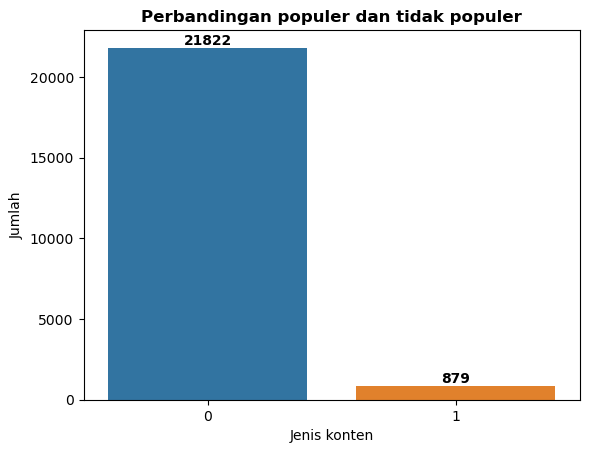

In [132]:
ax = sns.countplot(x=dataset['popularity'])

ax.bar_label(ax.containers[0], fontweight='bold')

plt.title('Perbandingan populer dan tidak populer', fontweight='bold')
plt.xlabel('Jenis konten')
plt.ylabel('Jumlah')

plt.show()

In [134]:
dataset = dataset.drop(columns='url', axis=1)

In [135]:
dataset

,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8,popularity
0,1,1,1,1,1,1,1,1,0
1,2,2,2,0,0,0,0,0,1
2,1,1,3,1,2,2,2,2,1
3,3,3,4,0,0,0,0,0,1
4,2,3,5,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
53127,1,1,3,1,14,12,11020,12313,0
53129,1,7,25,34,4,2672,0,0,0
53133,1,1,3,1,29,97,11021,12314,0
53137,1,1,3,7,134,2673,0,0,0


In [136]:
X = dataset.drop('popularity', axis=1)
y = dataset['popularity']

In [137]:
X

,prefix_1,prefix_2,prefix_3,prefix_4,prefix_5,prefix_6,prefix_7,prefix_8
0,1,1,1,1,1,1,1,1
1,2,2,2,0,0,0,0,0
2,1,1,3,1,2,2,2,2
3,3,3,4,0,0,0,0,0
4,2,3,5,2,0,0,0,0
...,...,...,...,...,...,...,...,...
53127,1,1,3,1,14,12,11020,12313
53129,1,7,25,34,4,2672,0,0
53133,1,1,3,1,29,97,11021,12314
53137,1,1,3,7,134,2673,0,0


In [138]:
y

0        0
1        1
2        1
3        1
4        1
        ..
53127    0
53129    0
53133    0
53137    0
53138    0
Name: popularity, Length: 22701, dtype: int64

In [139]:
# !pip3 install -U scikit-learn scipy matplotlib

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [142]:
from collections import Counter
print(f'Before Oversampling: {Counter(y_train)} ')

Before Oversampling: Counter({0: 17447, 1: 713}) 


In [143]:
# !pip3 install imbalanced-learn --upgrade

In [144]:
from imblearn.over_sampling import SMOTE


In [145]:
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [146]:
print(f'After Oversampling: {Counter(y_train_smote)}')

After Oversampling: Counter({0: 17447, 1: 17447})


In [147]:
y_train_smote.value_counts()

0    17447
1    17447
Name: popularity, dtype: int64

Text(0, 0.5, 'Jumlah')

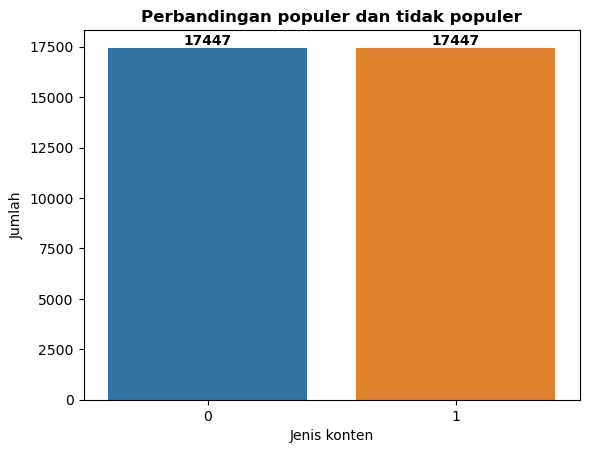

In [148]:
ax = sns.countplot(x=y_train_smote)

ax.bar_label(ax.containers[0], fontweight='bold')

plt.title('Perbandingan populer dan tidak populer', fontweight='bold')
plt.xlabel('Jenis konten')
plt.ylabel('Jumlah')

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

svc = SVC()
svc.fit(X_train_smote, y_train_smote)

dtc = DecisionTreeClassifier()
dtc.fit(X_train_smote, y_train_smote)

rfc = RandomForestClassifier()
rfc.fit(X_train_smote, y_train_smote)

gbc = GradientBoostingClassifier()
gbc.fit(X_train_smote, y_train_smote)

C:\Users\RESIDENSI-03\.conda\envs\neural\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [150]:
y_pred1 = lr.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = svc.predict(X_test)
y_pred4 = dtc.predict(X_test)
y_pred5 = rfc.predict(X_test)
y_pred6 = gbc.predict(X_test)

In [151]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

print(f'ROC AUC for Logistic Regression {roc_auc_score(y_test, y_pred1)}')
print(f'ROC AUC for KNeighbors Classifier {roc_auc_score(y_test, y_pred2)}')
print(f'ROC AUC for SVC {roc_auc_score(y_test, y_pred3)}')
print(f'ROC AUC for Decision Tree Classifier {roc_auc_score(y_test, y_pred4)}')
print(f'ROC AUC for Random Forest Classifier {roc_auc_score(y_test, y_pred5)}')
print(f'ROC AUC for Gradient Boosting Classifier {roc_auc_score(y_test, y_pred6)}')

ROC AUC for Logistic Regression 0.8338265060240964
ROC AUC for KNeighbors Classifier 0.7972833046471601
ROC AUC for SVC 0.8626719449225473
ROC AUC for Decision Tree Classifier 0.7875793459552495
ROC AUC for Random Forest Classifier 0.79935834767642
ROC AUC for Gradient Boosting Classifier 0.8961907056798623


In [152]:
print(f'ACC for Logistic Regression {accuracy_score(y_test, y_pred1)}')
print(f'ACC for KNeighbors Classifier {accuracy_score(y_test, y_pred2)}')
print(f'ACC for SVC {accuracy_score(y_test, y_pred3)}')
print(f'ACC for Decision Tree Classifier {accuracy_score(y_test, y_pred4)}')
print(f'ACC for Random Forest Classifier {accuracy_score(y_test, y_pred5)}')
print(f'ACC for Gradient Boosting Classifier {accuracy_score(y_test, y_pred6)}')

ACC for Logistic Regression 0.8528958379211627
ACC for KNeighbors Classifier 0.8885707993833958
ACC for SVC 0.8079718123761286
ACC for Decision Tree Classifier 0.9312926668134772
ACC for Random Forest Classifier 0.9372384937238494
ACC for Gradient Boosting Classifier 0.8837260515304999


In [153]:
ex1 = lr.predict([[2, 5, 336, 0, 0, 0, 0, 0]])

C:\Users\RESIDENSI-03\.conda\envs\neural\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [154]:
if ex1 == 1:
    print('populer')
else:
    print('unpopuler')

populer


In [155]:
ex2 = knn.predict([[2, 5, 336, 0, 0, 0, 0, 0]])
ex3 = svc.predict([[2, 5, 336, 0, 0, 0, 0, 0]])
ex4 = dtc.predict([[2, 5, 336, 0, 0, 0, 0, 0]])
ex5 = rfc.predict([[2, 5, 336, 0, 0, 0, 0, 0]])
ex6 = gbc.predict([[2, 5, 336, 0, 0, 0, 0, 0]])

C:\Users\RESIDENSI-03\.conda\envs\neural\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\RESIDENSI-03\.conda\envs\neural\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\RESIDENSI-03\.conda\envs\neural\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\RESIDENSI-03\.conda\envs\neural\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\RESIDENSI-03\.conda\envs\neural\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.war

In [156]:
print(ex2)
print(ex3)
print(ex4)
print(ex5)
print(ex6)

[0]
[1]
[0]
[0]
[0]


In [157]:
result = pd.DataFrame({'Models': ['LR', 'KNN', 'SVC', 'DTC', 'RFC', 'GBC'],
                      'AUC': [roc_auc_score(y_test, y_pred1) * 100,
                             roc_auc_score(y_test, y_pred2) * 100,
                             roc_auc_score(y_test, y_pred3) * 100,
                             roc_auc_score(y_test, y_pred4) * 100,
                             roc_auc_score(y_test, y_pred5) * 100,
                             roc_auc_score(y_test, y_pred6) * 100],
                      'ACC': [accuracy_score(y_test, y_pred1) * 100,
                             accuracy_score(y_test, y_pred2) * 100,
                             accuracy_score(y_test, y_pred3) * 100,
                             accuracy_score(y_test, y_pred4) * 100,
                             accuracy_score(y_test, y_pred5) * 100,
                             accuracy_score(y_test, y_pred6) * 100]})

In [158]:
result

,Models,AUC,ACC
0,LR,83.382651,85.289584
1,KNN,79.728330,88.857080
2,SVC,86.267194,80.797181
3,DTC,78.757935,93.129267
4,RFC,79.935835,93.723849
5,GBC,89.619071,88.372605


In [159]:
result.sort_values(by='AUC', ascending=False).index

Int64Index([5, 2, 0, 4, 1, 3], dtype='int64')

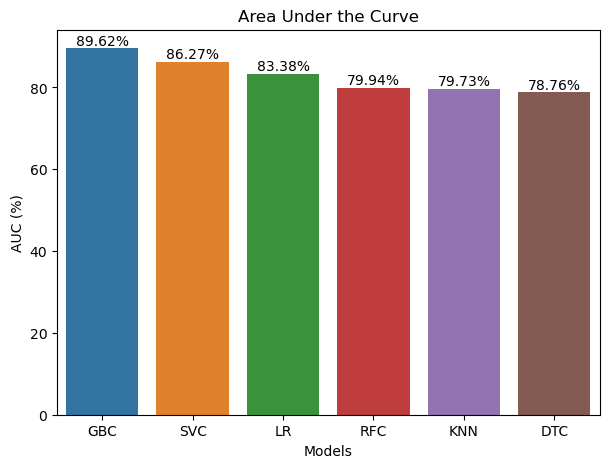

In [160]:
plt.figure(figsize=(7, 5))

ax = sns.barplot(x=result['Models'], y=result['AUC'], order=result.sort_values(by='AUC', ascending=False).Models)

ax.bar_label(ax.containers[0], fmt='%.2f%%')

plt.title('Area Under the Curve')
plt.ylabel('AUC (%)')

plt.show()

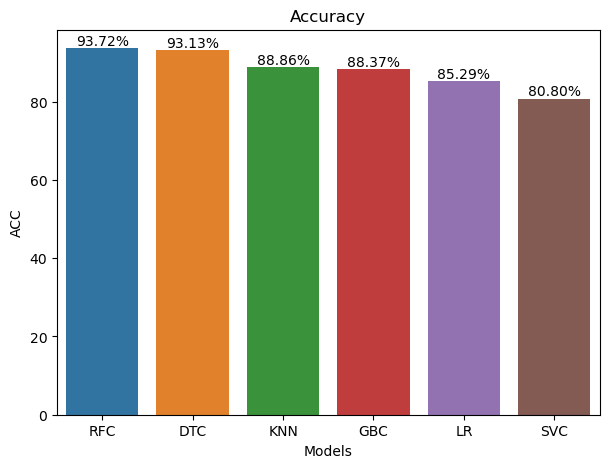

In [161]:
plt.figure(figsize=(7, 5))

ax = sns.barplot(x=result['Models'], y=result['ACC'], order=result.sort_values(by='ACC', ascending=False).Models)
ax.bar_label(ax.containers[0], fmt='%.2f%%')

plt.title('Accuracy')

plt.show()

In [162]:
import joblib

In [163]:
# joblib.dump(lr, 'wikipedia_classification_50000')

In [428]:
model_lr = joblib.load('./wikipedia_classification')

In [429]:
model_lr.predict([[2, 5, 336, 0, 0, 0, 0, 0]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)